In [1]:
import pandas as pd

In [2]:
import tensorflow as tf
import gensim
import numpy as np, scipy
print(tf.__version__, np.__version__, scipy.__version__, gensim.__version__)


2.20.0 1.26.4 1.13.1 4.3.3


In [3]:
#!pip install tensorflow

In [3]:
from tensorflow import keras
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential

In [4]:
train=pd.read_csv("engtamilTrain.csv")
train=train.drop(["Unnamed: 0"],axis=1)
english_sentences=train["en"]
tamil_sentence=train['ta']

In [5]:
english_sentences

0         MMA vice president Qazi Hussain Ahmad declared...
1         Information has surfaced in recent years sugge...
2         And Azor begat Sadoc; and Sadoc begat Achim; a...
3         She says she knows what is going on, but can d...
4         And be it indeed that I have erred, my error r...
                                ...                        
166866    Soon to be released, 'Silandhi' is produced by...
166867     An MHP deputy publicly stated, "Let them die."\n
166868    And Aaron shall make an atonement on the horns...
166869    Like the CWC, the UPF is part of the governmen...
166870    If I had been, the split would not have happen...
Name: en, Length: 166871, dtype: object

In [6]:
tamil_sentence

0         MMA கட்சியின் துணைத்தலைவர் க்வாஸி ஹுசேன் அகமத்...
1         சமீபகாலத்தில் சில தகவல்கள் யூலியஸ் ரோசன்பேர்க...
2         ஆசோர் சாதோக்கைப் பெற்றான்; சாதோக்கு ஆகீமைப் பெ...
3         என்ன நடக்கிறது என்பது தமக்கு தெரியும் என்றும் ...
4         நான் தப்பிநடந்தது மெய்யானாலும், என் தப்பிதம் எ...
                                ...                        
166866    விரைவில் திரைக்கு வர இருக்கும் 'சிலந்தி' படத்த...
166867    தேசியவாத இயக்கங்களின் கட்சி (MHP) யின் உபதலைவர...
166868    வருஷத்தில் ஒருமுறை ஆரோன் பாவநிவாரணபலியின் இரத்...
166869    இ.தொ.கா. போலவே, மலையக மக்கள் முன்னணியும் அரச...
166870    அந்த சமயம் மட்டும் நான் இங்கே இருந்திருந்தா அந...
Name: ta, Length: 166871, dtype: object

In [7]:
#Taking only few rows from english and tamil due to computational restrictions
english_sentences=english_sentences.head(30)
tamil_sentences=tamil_sentence.head(300)

In [8]:
english_sentences

0     MMA vice president Qazi Hussain Ahmad declared...
1     Information has surfaced in recent years sugge...
2     And Azor begat Sadoc; and Sadoc begat Achim; a...
3     She says she knows what is going on, but can d...
4     And be it indeed that I have erred, my error r...
5     Finally, the columnist fails to tell us who am...
6     These include the British Tamil Forum, La Mais...
7     Vijay accompanied with his wife and daughter e...
8     Both Musharraf and Vajpayee have exploited the...
9                                  But what happened?\n
10    'They lied to us about Vietnam and they are do...
11    But Rabshakeh said to them, Has my master sent...
12    The occupation of Bamerni gives the US-Turkish...
13    A joyful news is she has recently bought a fla...
14    So David slept with his fathers, and was burie...
15    Before his voyage overseas for shooting, he wa...
16    The lifting of the retirement age is presented...
17    Dharani's name was bandied as being the di

In [9]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [10]:
#pip show numpy

In [11]:
#pip show scipy

In [12]:
#pip show tensorflow

In [13]:
#pip list | findstr "tensorflow numpy scipy gensim"

In [14]:
#pip uninstall -y tensorflow numpy scipy gensim

#TOKENISATION

In [15]:
dataset = english_sentences

# convert each sentence to a list of words
sentences = [sentence.split() for sentence in dataset]

# print the result
print(sentences)

[['MMA', 'vice', 'president', 'Qazi', 'Hussain', 'Ahmad', 'declared', 'last', 'month:', "'We", 'are', 'not', 'extremists.'], ['Information', 'has', 'surfaced', 'in', 'recent', 'years', 'suggesting', 'that', 'Julius', 'Rosenberg', 'was', 'involved', 'in', 'passing', 'some', 'form', 'of', 'intelligence', 'to', 'Soviet', 'officials', 'during', 'the', 'Second', 'World', 'War.'], ['And', 'Azor', 'begat', 'Sadoc;', 'and', 'Sadoc', 'begat', 'Achim;', 'and', 'Achim', 'begat', 'Eliud;'], ['She', 'says', 'she', 'knows', 'what', 'is', 'going', 'on,', 'but', 'can', 'do', 'nothing', 'about', 'it.'], ['And', 'be', 'it', 'indeed', 'that', 'I', 'have', 'erred,', 'my', 'error', 'remains', 'with', 'myself.'], ['Finally,', 'the', 'columnist', 'fails', 'to', 'tell', 'us', 'who', 'among', 'the', 'political', 'leaders', 'of', 'the', 'bourgeoisie,', 'past', 'and', 'present,', 'he', 'counts', 'among', 'the', 'paragons', 'of', 'morality.'], ['These', 'include', 'the', 'British', 'Tamil', 'Forum,', 'La', 'Maiso

In [16]:
english_sentences[0].split()

['MMA',
 'vice',
 'president',
 'Qazi',
 'Hussain',
 'Ahmad',
 'declared',
 'last',
 'month:',
 "'We",
 'are',
 'not',
 'extremists.']

In [18]:
def sent_Token(sentence):
        # define your dataset
    dataset = sentence

    # convert each sentence to a list of words
    sentences = [sentence.split() for sentence in dataset]

    # print the result
    print(sentences)
    
    return sentences

In [19]:
engSentence=sent_Token(english_sentences)
engSentence

[['MMA', 'vice', 'president', 'Qazi', 'Hussain', 'Ahmad', 'declared', 'last', 'month:', "'We", 'are', 'not', 'extremists.'], ['Information', 'has', 'surfaced', 'in', 'recent', 'years', 'suggesting', 'that', 'Julius', 'Rosenberg', 'was', 'involved', 'in', 'passing', 'some', 'form', 'of', 'intelligence', 'to', 'Soviet', 'officials', 'during', 'the', 'Second', 'World', 'War.'], ['And', 'Azor', 'begat', 'Sadoc;', 'and', 'Sadoc', 'begat', 'Achim;', 'and', 'Achim', 'begat', 'Eliud;'], ['She', 'says', 'she', 'knows', 'what', 'is', 'going', 'on,', 'but', 'can', 'do', 'nothing', 'about', 'it.'], ['And', 'be', 'it', 'indeed', 'that', 'I', 'have', 'erred,', 'my', 'error', 'remains', 'with', 'myself.'], ['Finally,', 'the', 'columnist', 'fails', 'to', 'tell', 'us', 'who', 'among', 'the', 'political', 'leaders', 'of', 'the', 'bourgeoisie,', 'past', 'and', 'present,', 'he', 'counts', 'among', 'the', 'paragons', 'of', 'morality.'], ['These', 'include', 'the', 'British', 'Tamil', 'Forum,', 'La', 'Maiso

[['MMA',
  'vice',
  'president',
  'Qazi',
  'Hussain',
  'Ahmad',
  'declared',
  'last',
  'month:',
  "'We",
  'are',
  'not',
  'extremists.'],
 ['Information',
  'has',
  'surfaced',
  'in',
  'recent',
  'years',
  'suggesting',
  'that',
  'Julius',
  'Rosenberg',
  'was',
  'involved',
  'in',
  'passing',
  'some',
  'form',
  'of',
  'intelligence',
  'to',
  'Soviet',
  'officials',
  'during',
  'the',
  'Second',
  'World',
  'War.'],
 ['And',
  'Azor',
  'begat',
  'Sadoc;',
  'and',
  'Sadoc',
  'begat',
  'Achim;',
  'and',
  'Achim',
  'begat',
  'Eliud;'],
 ['She',
  'says',
  'she',
  'knows',
  'what',
  'is',
  'going',
  'on,',
  'but',
  'can',
  'do',
  'nothing',
  'about',
  'it.'],
 ['And',
  'be',
  'it',
  'indeed',
  'that',
  'I',
  'have',
  'erred,',
  'my',
  'error',
  'remains',
  'with',
  'myself.'],
 ['Finally,',
  'the',
  'columnist',
  'fails',
  'to',
  'tell',
  'us',
  'who',
  'among',
  'the',
  'political',
  'leaders',
  'of',
  'the',


In [20]:
#MODEL Creation
model= Word2Vec(engSentence,min_count=1)
print(model)

Word2Vec<vocab=390, vector_size=100, alpha=0.025>


In [35]:
print(model.wv["recently"])

[ 0.00145504 -0.00336668  0.00703746 -0.0013072   0.00775131 -0.00326888
 -0.00924688  0.00223451 -0.00600601 -0.009919    0.00704205  0.00498787
  0.00118902 -0.0084034  -0.0012952  -0.00171867  0.00704037 -0.00414727
  0.00330323  0.00977497 -0.00777897 -0.00093238  0.0063492   0.00185016
  0.00796772  0.00587595 -0.00085374 -0.00708653 -0.0018218   0.00597961
 -0.00963989 -0.0092045   0.00656325 -0.00982424  0.00987083 -0.00128097
 -0.00065922 -0.00875653 -0.00011208  0.00911563 -0.00148407 -0.00235426
 -0.00453483  0.00146491  0.0032422  -0.00724071 -0.00100708 -0.00064716
  0.00759209 -0.00838847 -0.00909941  0.00197942 -0.00912507 -0.00702208
 -0.00375302 -0.00687079 -0.00458794 -0.00801416  0.00683834 -0.00010247
  0.00946059 -0.00581598  0.00671614  0.0010573   0.00947964 -0.00040564
 -0.00146424  0.00237259 -0.00662457  0.0082157  -0.00897882 -0.00876936
  0.00985415  0.00407116 -0.00261711  0.00581394  0.00138854 -0.00812612
 -0.00188099 -0.00789481  0.00914748 -0.00924535 -0

In [21]:
# save model
model.save("model1.bin")

In [22]:
model.wv.vectors

array([[-6.1447895e-04,  3.2022837e-04,  5.1762760e-03, ...,
        -7.7198511e-03,  9.1614673e-04,  6.4059314e-03],
       [-8.6955503e-03,  3.6939483e-03,  5.2137859e-03, ...,
        -2.6744741e-03, -9.4686290e-03,  4.5429044e-03],
       [-3.2642089e-05,  3.1387231e-03, -6.7233592e-03, ...,
         1.5333651e-04,  8.2238270e-03, -7.0115845e-03],
       ...,
       [ 5.2424790e-03,  8.0337217e-03,  6.0628909e-03, ...,
         3.7264542e-03, -9.7391596e-03,  2.7824824e-03],
       [ 4.8390782e-04,  9.4124498e-03,  9.5797628e-03, ...,
         9.6363258e-03, -8.6865192e-03,  5.9644929e-03],
       [-6.9969143e-03,  8.5628089e-03,  1.6964863e-04, ...,
        -4.7371220e-03, -8.1516141e-03,  9.4076591e-03]], dtype=float32)

In [23]:
model.wv.vectors.shape

(390, 100)

In [24]:
X = model.wv.vectors  # corrected line
pca = PCA(n_components=2)
result = pca.fit_transform(X)

In [25]:
result

array([[ 2.32210499e-03,  5.86787006e-03],
       [ 2.07226165e-02,  5.03260363e-03],
       [-2.96188984e-03,  3.53571936e-03],
       [ 6.15131715e-03,  9.38734505e-03],
       [ 1.71346366e-02,  1.99235301e-03],
       [-1.16450377e-02,  1.26636773e-02],
       [-9.18269579e-05,  3.93471355e-03],
       [-3.49512463e-03,  9.36747342e-03],
       [-3.40933097e-03,  1.56313814e-02],
       [-3.63397016e-03, -1.00111756e-02],
       [-2.41000997e-03,  5.41496649e-03],
       [-5.47722913e-03,  1.64247267e-02],
       [ 1.14131114e-02,  6.70209108e-03],
       [ 9.80886165e-03, -1.24099189e-02],
       [ 9.41728521e-03,  7.65821431e-03],
       [ 1.11117773e-02,  1.78550985e-02],
       [ 2.82150437e-03, -5.44125820e-03],
       [-1.30330361e-02,  1.17344242e-02],
       [-5.79681946e-03, -3.24927340e-03],
       [-9.33027826e-03, -2.95787514e-03],
       [-1.07084382e-02,  3.56073258e-03],
       [ 1.37169464e-02, -1.07331406e-02],
       [ 1.54075911e-02,  2.33600917e-03],
       [ 1.

In [26]:
result.shape

(390, 2)

In [27]:
result[260]

array([-0.01081679, -0.00393431], dtype=float32)

In [28]:
model.wv

In [29]:
model.wv.index_to_key

['the',
 'and',
 'to',
 'of',
 'in',
 'was',
 'that',
 'is',
 'The',
 'with',
 'have',
 'a',
 'for',
 'on',
 'I',
 'Tamil',
 'their',
 'my',
 'as',
 'these',
 'going',
 'begat',
 'he',
 'will',
 'about',
 'which',
 'his',
 'But',
 'has',
 'it',
 'at',
 'Vietnam',
 'me',
 'sent',
 'your',
 'be',
 'A',
 'two',
 'things',
 'In',
 'percent',
 'public',
 'living',
 'might',
 'from',
 'so',
 'us',
 'British',
 'Lord',
 'they',
 'what',
 'among',
 'who',
 'said',
 'where',
 'city',
 'class',
 'Soviet',
 'are',
 "'We",
 'own',
 'War.',
 'And',
 'sit',
 'Hussain',
 'working',
 'she',
 'you,',
 'not',
 'shore',
 'forces',
 'administrations.',
 'ability',
 'US-Turkish',
 'fragile',
 'up',
 'happened?',
 'gives',
 'master,',
 'home',
 'record',
 'Bamerni',
 'Syrian-Iraqi',
 'attention',
 'railroad,',
 'key',
 'divert',
 'drive',
 'supply',
 'link',
 'war',
 'strike',
 'doing',
 "'They",
 'lied',
 'speak',
 'words?',
 'current',
 'Has',
 'men',
 'them,',
 'Rabshakeh',
 'duty',
 'tours',
 'wall,',
 

In [30]:
len(model.wv.index_to_key)

390

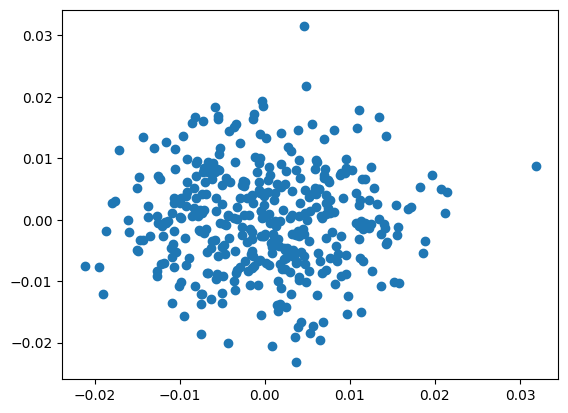

In [31]:
from matplotlib import pyplot as plt
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.index_to_key)

In [32]:
words

['the',
 'and',
 'to',
 'of',
 'in',
 'was',
 'that',
 'is',
 'The',
 'with',
 'have',
 'a',
 'for',
 'on',
 'I',
 'Tamil',
 'their',
 'my',
 'as',
 'these',
 'going',
 'begat',
 'he',
 'will',
 'about',
 'which',
 'his',
 'But',
 'has',
 'it',
 'at',
 'Vietnam',
 'me',
 'sent',
 'your',
 'be',
 'A',
 'two',
 'things',
 'In',
 'percent',
 'public',
 'living',
 'might',
 'from',
 'so',
 'us',
 'British',
 'Lord',
 'they',
 'what',
 'among',
 'who',
 'said',
 'where',
 'city',
 'class',
 'Soviet',
 'are',
 "'We",
 'own',
 'War.',
 'And',
 'sit',
 'Hussain',
 'working',
 'she',
 'you,',
 'not',
 'shore',
 'forces',
 'administrations.',
 'ability',
 'US-Turkish',
 'fragile',
 'up',
 'happened?',
 'gives',
 'master,',
 'home',
 'record',
 'Bamerni',
 'Syrian-Iraqi',
 'attention',
 'railroad,',
 'key',
 'divert',
 'drive',
 'supply',
 'link',
 'war',
 'strike',
 'doing',
 "'They",
 'lied',
 'speak',
 'words?',
 'current',
 'Has',
 'men',
 'them,',
 'Rabshakeh',
 'duty',
 'tours',
 'wall,',
 

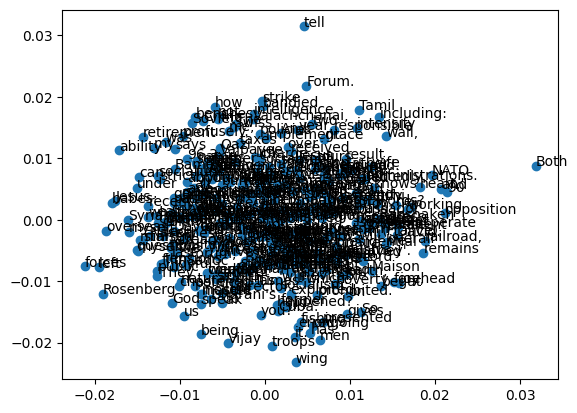

In [33]:
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.index_to_key)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()